In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.rename(columns = {'SepalLengthCm' : 'SL', 'SepalWidthCm' : 'SW', 'PetalLengthCm' : 'PL', 'PetalWidthCm' : 'PW'}, inplace = True)


In [4]:
iris_setosa = df[df['Species'] == 'Iris-setosa']
iris_versicolor = df[df['Species'] == 'Iris-versicolor']
iris_virginica = df[df['Species'] == 'Iris-virginica']

<Axes: xlabel='PL', ylabel='Count'>

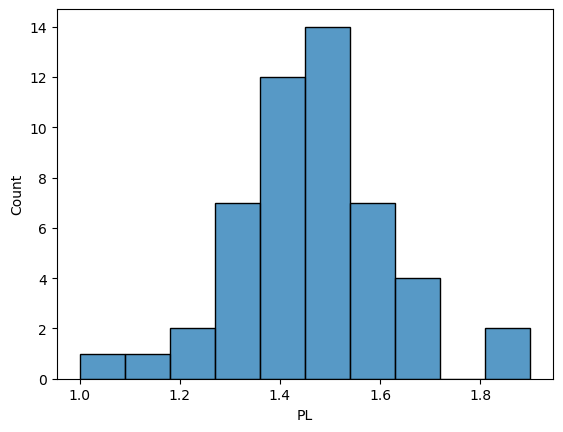

In [5]:
sns.histplot(iris_setosa['PL'])

### NOTE:
* If we plot only "Histogram" for all the three species, then it will be difficult to Interpret.
* So, in that case we will be using PDF (Density Function). It is a combination of Histogram and KDE (Kernel Density Estimation) cure.
* This kde curve is used to estimate probability density function.

C:\Users\priya\AppData\Local\Temp\ipykernel_61504\2905049187.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris_setosa['PL'])


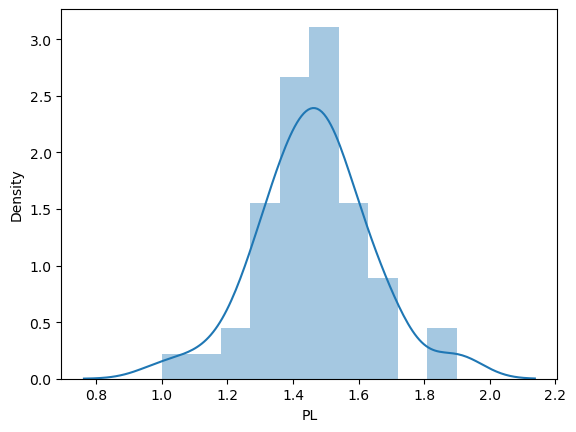

In [6]:
sns.distplot(iris_setosa['PL'])

plt.show()

### Since the Jupyter Notebook is showing a red box and asking us to avoid using "distplot"; we can modify the abive but still get the same output:

<Axes: xlabel='PL', ylabel='Count'>

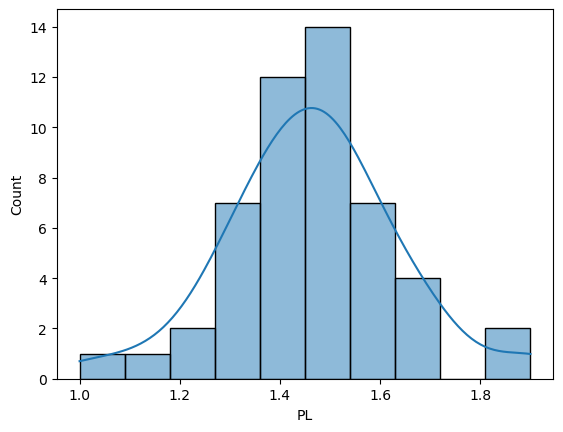

In [7]:
sns.histplot(iris_setosa['PL'], kde = True)

## What is PDF?
### It is a density function which is calculated using the Kernel Density Estimation Technique.

### To plot the Distribution Plots of 'Petal Length' for all the three species:

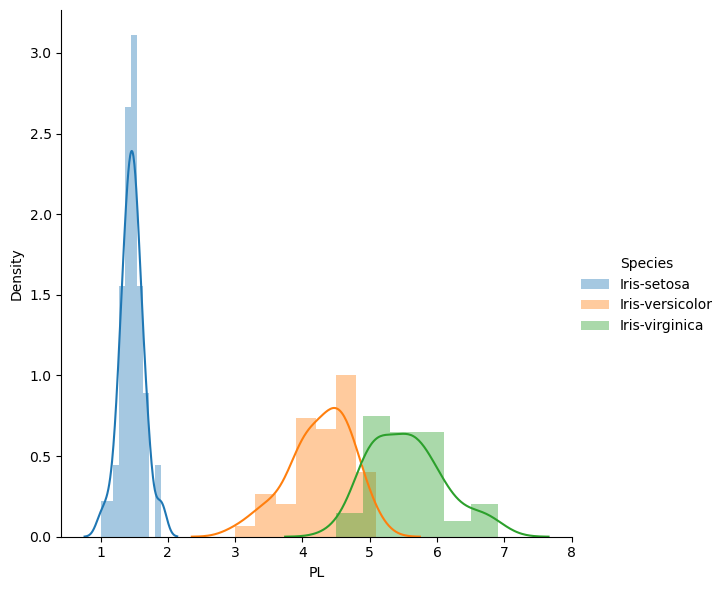

In [8]:
import warnings
warnings.filterwarnings('ignore')


sns.FacetGrid(df, hue = 'Species', height = 6).map(sns.distplot, 'PL').add_legend()

### NOTE:
From the above we can conclude that
   * Species with the 'PL' < 2.1 is "Setosa".
   * Species with 'PL' > 2.5 and 'PL' < 4.8 [Since both the curves (green & orange) are overlapping, we will take the mid of the curve)is "Versicolor"].
   * Species with 'PL' > 4.8 is "Virginica".

### But, when we plot histogram, the graph looks like this:

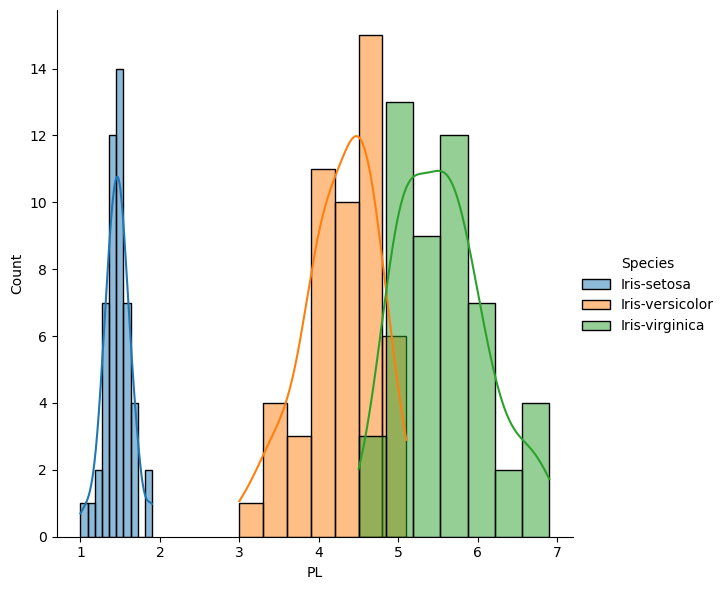

In [9]:
sns.FacetGrid(df, hue = 'Species', height = 6).map(sns.histplot, 'PL', kde = True).add_legend()

<Axes: xlabel='PL', ylabel='Count'>

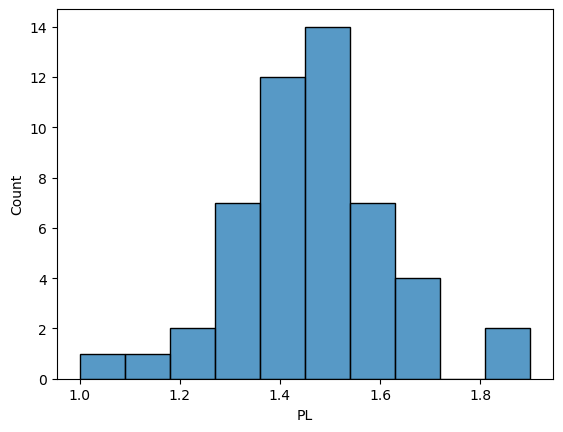

In [10]:
sns.histplot(iris_setosa['PL'])

In [11]:
np.histogram(iris_setosa['PL'], bins = 10)

(array([ 1,  1,  2,  7, 12, 14,  7,  4,  0,  2], dtype=int64),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]))

### NOTE:
The above two arrays shows that;
* First arrays shows the bins representing y-axis.
* Second array shows the bins representing x-axis.

In [12]:
counts, bin_edges = np.histogram(iris_setosa['PL'], bins = 10)

### Calculating PDF & CDF:

In [13]:
pdf = counts/sum(counts)

cdf = np.cumsum(pdf)

print("PDF: ", pdf)
print("CDF: ", cdf)

PDF:  [0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
CDF:  [0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


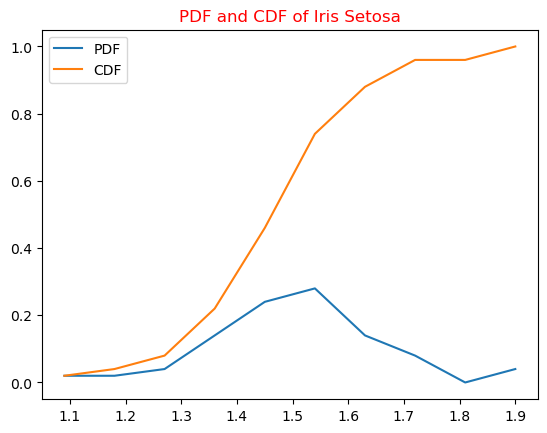

In [19]:
plt.plot(bin_edges[1:], pdf, label = "PDF")
plt.plot(bin_edges[1:], cdf, label = "CDF")

plt.legend()

plt.title("PDF and CDF of Iris Setosa", c = 'r')
plt.show()

In [ ]:
plt.plot(bin_edges[1:], pdf, )
plt.plot(bin_edges[1:], cdf)

### NOTE:
We have taken bin_edges[1:] = This is becoz there are total 11 bins whereas we have given bins = 10.
So, we have to consider 10 bins

### Let's examine the 'Petal length' of all the three species:

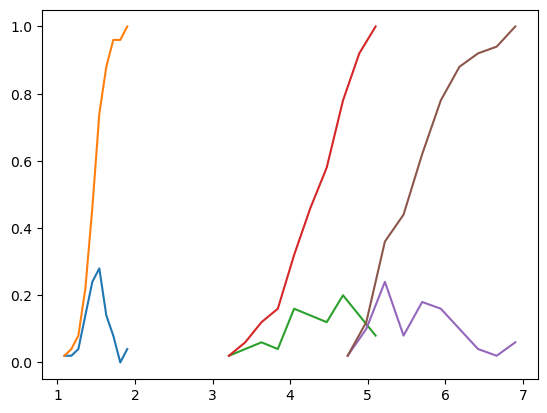

In [45]:
#iris_setosa:

counts, bin_edges = np.histogram(iris_setosa['PL'], bins = 10)

pdf = counts/ sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)




# iris_versicolor:
counts, bin_edges = np.histogram(iris_versicolor['PL'], bins = 10)

pdf = counts/ sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)



# iris_virginica:
counts, bin_edges = np.histogram(iris_virginica['PL'], bins = 10)

pdf = counts/ sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)